In [1]:
from scipy.stats import f_oneway
from scipy import stats

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get Data Summaries

In [37]:
import json

# Note that internally when designing and implementing the systems
# slightly different names were used
# 'constraintSolver' is the 'baseline' system in the manuscript
# 'constraintLearner' is the 'holistic' system in the manuscript
# 'granularLearner' is the 'granular' system in the manuscript
participantOrder = ['constraintSolver', 'constraintLearner',
                    'constraintSolver', 'constraintSolver',
                    'constraintSolver', 'constraintLearner',
                    'constraintSolver', 'constraintLearner',
                    'constraintLearner', 'constraintSolver',
                    'constraintLearner', 'constraintLearner',
                    'granularLearner', 'granularLearner',
                    'granularLearner', 'granularLearner',
                    'granularLearner', 'granularLearner']

baseFilename = "./session_data/sessionData_"

allParticipants = []
allPinned = []

# loop through all participants
for i in range(1, 19):

    systemType = participantOrder[i - 1]
    
    filename = baseFilename + str(i) + ".json"
    
    participantData = {"systemType": systemType,
                        "participantNumber": i,
                        "marks": [],
                        "channels": [],
                        "channelCount": [],
                        "uniqueMarks": set(),
                        "uniqueChannels": set(),
                        "uniqueAggregates": set(),
                        "uniqueFields": set(),
                        "uniqueMappings": set()}
    
    listPinned = []

    with open(filename, 'r') as file:
        data = json.load(file)

        sessionData = data["session"]

        for j in sessionData:
            # add visualizations that are pinned
            if j["label"] == "pinned":
                listPinned.append(j)
                
            # remove visualizations that are later unpinned
            elif j["label"] == "unpinned":
                
                # the uid is stored under different attributes for the different system types
                # just index into the json using the appropriate attribute
                if (systemType == "constraintLearner") or (systemType == "granularLearner"):
                    for lp in listPinned:
                        if (lp["vega"]["uid"] == j["chart"]["uid"]):
                            listPinned.remove(lp)
                elif systemType == "constraintSolver":
                    for lp in listPinned:
                        if (lp["pinned"]["uid"] == j["chart"]["uid"]):
                            listPinned.remove(lp)
                            
    # each participant should only have 5 pinned visualizations
    assert(len(listPinned) == 5)
    
    allPinned.append(listPinned)
    
    # get only the vega specification from the data
    # other attributes (such as time and uid are dropped)
    if systemType == "constraintLearner" or systemType == "granularLearner":
        listPinned = list(map(lambda p: p["vega"]["vega"], listPinned))
    else:
        listPinned = list(map(lambda p: p["pinned"]["vega"], listPinned))

    for p in listPinned:
        mark = p["mark"]
        participantData["marks"].append(mark)
        participantData["uniqueMarks"].add(mark)
        channelCount = 0
        for channel in p["encoding"]:
            if channel == "label" or "mark" in channel: 
                continue
            channelAggregate = p["encoding"][channel]["aggregate"] if ("aggregate" in p["encoding"][channel]) else None
            channelField = p["encoding"][channel]["field"] if ("field" in p["encoding"][channel]) else "count of records"
            participantData["channels"].append((channel, channelField, channelAggregate))
            participantData["uniqueChannels"].add(channel)
            channelCount += 1
            participantData["uniqueAggregates"].add(channelAggregate)
            participantData["uniqueFields"].add(channelField)
            participantData["uniqueMappings"].add((channel, channelField, channelAggregate))

        participantData["channelCount"].append(channelCount)

    allParticipants.append(participantData)

### Channels

In [14]:
def getChannels():
    
    print("constraintSolver")
    
    for i in allParticipants:

        if i["systemType"] == "constraintSolver":
            solver_channels = i["channelCount"]
            print(sum(solver_channels) / 5, end = ", ")
            
    print()
    
    print("constraintLearner")
    
    # for each participant, get total channels used,
    # then average across 5 pinned visualizations
    for i in allParticipants:

        if i["systemType"] == "constraintLearner":
            learner_channels = i["channelCount"]
            print(sum(learner_channels) / 5, end = ", ")
            
    print()

    print("granularLearner")
    for i in allParticipants:

        if i["systemType"] == "granularLearner":
            granular_channels = i["channelCount"]
            print(sum(granular_channels) / 5, end = ", ")
            
getChannels()

constraintSolver
2.4, 2.2, 2.4, 2.6, 2.8, 2.8, 
constraintLearner
2.8, 3.0, 2.6, 3.0, 2.6, 3.0, 
granularLearner
3.0, 2.4, 2.4, 3.0, 3.2, 2.8, 

In [23]:
# get average channels used per visualization for participants in the 3 conditions

solver_channels = [2.4, 2.2, 2.4, 2.6, 2.8, 2.8]
learner_channels = [2.8, 3.0, 2.6, 3.0, 2.6, 3.0]
granular_channels = [3.0, 2.4, 2.4, 3.0, 3.2, 2.8]

solver_channels_mean = sum([2.4, 2.2, 2.4, 2.6, 2.8, 2.8])/6
learner_channels_mean = sum([2.8, 3.0, 2.6, 3.0, 2.6, 3.0])/6
granular_channels_mean = sum([3.0, 2.4, 2.4, 3.0, 3.2, 2.8])/6

### Marks

In [16]:
def getMarks():
    
    print("constraintSolver")
    
    for i in allParticipants:

        if i["systemType"] == "constraintSolver":
            solver_marks = i["uniqueMarks"]
            print(len(solver_marks), end = ", ")
            
    print()
    
    print("constraintLearner")
    
    # for each participant, get total channels used,
    # then average across 5 pinned visualizations
    for i in allParticipants:

        if i["systemType"] == "constraintLearner":
            learner_marks = i["uniqueMarks"]
            print(len(learner_marks), end = ", ")
            
    print()

    print("granularLearner")
    for i in allParticipants:

        if i["systemType"] == "granularLearner":
            granular_marks = i["uniqueMarks"]
            print(len(granular_marks), end = ", ")
            
getMarks()

constraintSolver
3, 2, 3, 3, 3, 3, 
constraintLearner
3, 4, 4, 3, 2, 4, 
granularLearner
4, 3, 3, 3, 2, 4, 

In [27]:
# get average number of unique marks explored by participants in the 3 conditions

solver_marks = [3, 2, 3, 3, 3, 3]
learner_marks = [3, 4, 4, 3, 2, 4]
granular_marks = [4, 3, 3, 3, 2, 4]

solver_marks_means = sum([3, 2, 3, 3, 3, 3])/6
learner_marks_means = sum([3, 4, 4, 3, 2, 4])/6
granular_marks_means = sum([4, 3, 3, 3, 2, 4])/6

### Data Dimensions

In [20]:
def getDimensions():
    
    print("constraintSolver")
    
    for i in allParticipants:

        if i["systemType"] == "constraintSolver":
            solver_dimensions = i["uniqueFields"]
            
            # Since count of records is an aggregate and not a data dimension
            # we remove it from our summary statistics
            try:
                solver_dimensions.remove("count of records")
            except: pass
            
            print(len(solver_dimensions), end = ", ")
            
    print()
    
    print("constraintLearner")
    
    # for each participant, get total channels used,
    # then average across 5 pinned visualizations
    for i in allParticipants:

        if i["systemType"] == "constraintLearner":
            learner_dimensions = i["uniqueFields"]
            
            try:
                learner_dimensions.remove("count of records")
            except: pass
            
            print(len(learner_dimensions), end = ", ")
            
    print()

    print("granularLearner")
    for i in allParticipants:

        if i["systemType"] == "granularLearner":
            granular_dimensions = i["uniqueFields"]
            
            try:
                granular_dimensions.remove("count of records")
            except: pass
            
            print(len(granular_dimensions), end = ", ")
            
getDimensions()

constraintSolver
6, 5, 4, 6, 6, 5, 
constraintLearner
5, 4, 5, 5, 3, 5, 
granularLearner
4, 4, 5, 4, 5, 4, 

In [30]:
# get average number of unique data dimensions explored by participants in the 3 conditions

solver_dimensions = [6, 5, 4, 6, 6, 5]
learner_dimensions = [5, 4, 5, 5, 3, 5]
granular_dimensions = [4, 4, 5, 4, 5, 4]

solver_dimensions_mean = sum([6, 5, 4, 6, 6, 5])/6
learner_dimensions_mean = sum([5, 4, 5, 5, 3, 5])/6
granular_dimensions_mean = sum([4, 4, 5, 4, 5, 4])/6

# Plots

In [25]:
colors=["red", "green", "blue"]

### Channel Plot

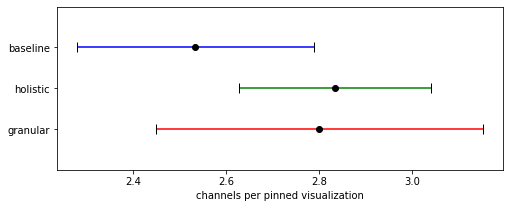

In [29]:
df = pd.DataFrame(granular_channels, columns=["granular"])
df['holistic'] = pd.Series(learner_channels, index=df.index)
df['baseline'] = pd.Series(solver_channels, index=df.index)

value = df.mean()
std = np.array([granular_channels_mean-stats.t.interval(alpha=0.95, df=len(granular_channels)-1, loc=np.mean(granular_channels), scale=stats.sem(granular_channels))[0],
                learner_channels_mean-stats.t.interval(alpha=0.95, df=len(learner_channels)-1, loc=np.mean(learner_channels), scale=stats.sem(learner_channels))[0],
                solver_channels_mean-stats.t.interval(alpha=0.95, df=len(solver_channels)-1, loc=np.mean(solver_channels), scale=stats.sem(solver_channels))[0],]).T

plt.rcParams["figure.figsize"] = (8,3)

container = plt.errorbar(value, ["baseline", "holistic", "granular"],
        xerr=std, fmt='o', capsize=5, color="black")

container.lines[2][0].set_color(colors)

plt.yticks(range(len(df.columns)), df.columns)
plt.ylim(-1, 3)
# plt.ylabel('channels')
# plt.title('Something')
plt.xlabel('channels per pinned visualization')
plt.savefig("channels.png", bbox_inches = "tight")

### Marks Plot

In [28]:
df = pd.DataFrame(granular_marks, columns = ["granular"])
df['holistic'] = pd.Series(learner_marks, index=df.index)
df["baseline"] = pd.Series(solver_marks, index = df.index)

value = df.mean()
std = np.array([granular_marks_means-stats.t.interval(alpha=0.95, df=len(granular_marks)-1, loc=np.mean(granular_marks), scale=stats.sem(granular_marks))[0],
                learner_marks_means-stats.t.interval(alpha=0.95, df=len(learner_marks)-1, loc=np.mean(learner_marks), scale=stats.sem(learner_marks))[0],
                solver_marks_means-stats.t.interval(alpha=0.95, df=len(solver_marks)-1, loc=np.mean(solver_marks), scale=stats.sem(solver_marks))[0],]).T

plt.rcParams["figure.figsize"] = (8,3)

container = plt.errorbar(value, ["baseline", "holistic", "granular"],
        xerr=std, fmt='o', capsize=5, color="black")

container.lines[2][0].set_color(colors)

plt.yticks(range(len(df.columns)), df.columns)
plt.ylim(-1, 3)
plt.xlabel('unique marks pinned')
plt.savefig("marks.png", bbox_inches = "tight")

plt.show()

### Data Dimensions Plot

In [31]:
df = pd.DataFrame(granular_dimensions, columns=["granular"])
df['holistic'] = pd.Series(learner_dimensions, index=df.index)
df['baseline'] = pd.Series(solver_dimensions, index=df.index)

value = df.mean()
std = np.array([granular_dimensions_mean-stats.t.interval(alpha=0.95, df=len(granular_dimensions)-1, loc=np.mean(granular_dimensions), scale=stats.sem(granular_dimensions))[0],
                learner_dimensions_mean-stats.t.interval(alpha=0.95, df=len(learner_dimensions)-1, loc=np.mean(learner_dimensions), scale=stats.sem(learner_dimensions))[0],
                solver_dimensions_mean-stats.t.interval(alpha=0.95, df=len(solver_dimensions)-1, loc=np.mean(solver_dimensions), scale=stats.sem(solver_dimensions))[0],]).T


plt.rcParams["figure.figsize"] = (8,3)

container = plt.errorbar(value, ["baseline", "holistic", "granular"],
        xerr=std, fmt='o', capsize=5, color="black")

container.lines[2][0].set_color(colors)

plt.yticks(range(len(df.columns)), df.columns)
plt.ylim(-1, 3)
plt.xlabel('unique data dimensions pinned')
plt.savefig("fields.png", bbox_inches = "tight")
plt.show()

# UMAP

In [32]:
import json
from pandas.io.json._normalize import nested_to_record    
import copy

In [33]:
filename = "./postprocessing/allPinned.json"

with open(filename, 'r') as file:
    data = json.load(file)

In [34]:
dataBySystem = []

dataAll = []

for participant in data:
    p = copy.deepcopy(participant)
    
    try:
        system = p["systemType"]
    except:
        print(p)

    if system == "constraintLearner" or system == "granularLearner":
        vis1 = p["vis1"]["vega"]["vega"]
        vis2 = p["vis2"]["vega"]["vega"]
        vis3 = p["vis3"]["vega"]["vega"]
        vis4 = p["vis4"]["vega"]["vega"]
        vis5 = p["vis5"]["vega"]["vega"]
    else:
        vis1 = p["vis1"]["pinned"]["vega"]
        vis2 = p["vis2"]["pinned"]["vega"]
        vis3 = p["vis3"]["pinned"]["vega"]
        vis4 = p["vis4"]["pinned"]["vega"]
        vis5 = p["vis5"]["pinned"]["vega"]

    for vis in [vis1, vis2, vis3, vis4, vis5]:
        flattened = nested_to_record(vis, sep='.')
        flattened["system"] = system
        dataBySystem.append(flattened)
        dataAll.append(vis)

dataBySystem

[{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
  'mark': 'tick',
  'width': 270,
  'height': 270,
  'data.url': 'movies.csv',
  'encoding.x.type': 'ordinal',
  'encoding.x.field': 'genre',
  'encoding.y.type': 'quantitative',
  'encoding.y.field': 'rating',
  'encoding.y.scale.zero': False,
  'system': 'constraintSolver'},
 {'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
  'mark': 'bar',
  'width': 270,
  'height': 270,
  'data.url': 'movies.csv',
  'encoding.x.type': 'ordinal',
  'encoding.x.field': 'genre',
  'encoding.y.type': 'quantitative',
  'encoding.y.aggregate': 'mean',
  'encoding.y.field': 'votes',
  'encoding.y.scale.zero': True,
  'system': 'constraintSolver'},
 {'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
  'mark': 'point',
  'width': 270,
  'height': 270,
  'data.url': 'movies.csv',
  'encoding.size.type': 'quantitative',
  'encoding.size.aggregate': 'count',
  'encoding.size.scale.zero': True,
  'encoding.x.type': 'ordin

In [39]:
import pandas as pd

df = pd.DataFrame.from_dict(dataBySystem)

systemList = df["system"]

# Remove data that is identical for all visualizations
# also remove "label" that was provided by users for some visualizations
df = df.drop(columns=['encoding.label', '$schema', 'width', 'height', 'data.url', "system"])

# Fill NaN
df = df.fillna(0)

cols = list(df)

for c in cols:
    df[c] = pd.Categorical(df[c]).codes
    
df

mark  encoding.x.type  encoding.x.field  encoding.y.type  \
0      5                2                 1                2   
1      1                2                 1                2   
2      3                2                 1                1   
3      3                3                 2                0   
4      5                1                 5                2   
..   ...              ...               ...              ...   
85     1                3                 4                1   
86     5                3                 0                2   
87     3                1                 5                2   
88     5                1                 5                2   
89     4                1                 5                2   

    encoding.y.field  encoding.y.scale.zero  encoding.y.aggregate  \
0                  4                      0                     0   
1                  6                      1                     2   
2                  3                      0                     0   
3                  5                      0                     0   
4                  4                      1                     0   
..               ...                    ...                   ...   
85                 5                      0                     0   
86                 4                      1                     0   
87                 2                      0                     0   
88                 2                      1                     0   
89                 4                      0                     0   

    encoding.size.type  encoding.size.aggregate  encoding.size.scale.zero  \
0                    0                        0                         0   
1                    0                        0                         0   
2                    1                        1                         1   
3                    1                        1                         1   
4                    0                        0                         0   
..                 ...                      ...                       ...   
85                   0                        0                         0   
86                   0                        0                         0   
87                   1                        1                         1   
88                   0                        0                         0   
89                   0                        0                         0   

    ...  encoding.color.field  encoding.mark_rect  encoding.mark_area  \
0   ...                     0                   0                   0   
1   ...                     0                   0                   0   
2   ...                     0                   0                   0   
3   ...                     0                   0                   0   
4   ...                     0                   0                   0   
..  ...                   ...                 ...                 ...   
85  ...                     0                   0                   0   
86  ...                     2                   0                   0   
87  ...                     0                   0                   0   
88  ...                     0                   0                   0   
89  ...                     0                   0                   0   

    encoding.size.field  encoding.y.stack  encoding.mark_line  \
0                     0                 0                   0   
1                     0                 0                   0   
2                     0                 0                   0   
3                     0                 0                   0   
4                     0                 0                   0   
..                  ...               ...                 ...   
85                    0                 0                   0   
86                    0                 0                   0   
87                 

In [46]:
from umap import UMAP

xy = UMAP(n_neighbors=15).fit_transform(df)

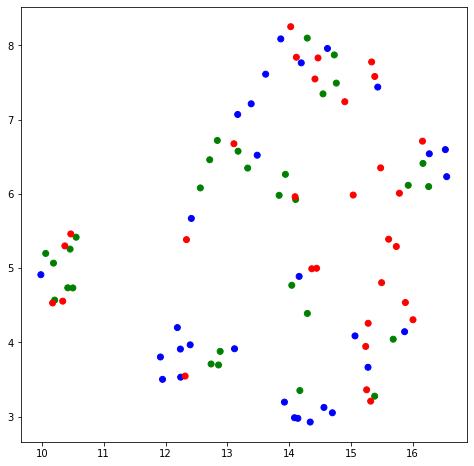

In [47]:
# Note that since UMAP does not preserve layout,
# the exact position of each point will be different when running the code again
# However, general trends will be preserved

import matplotlib.pyplot as plt

colors = systemList.replace({"constraintSolver": "blue", "constraintLearner": "green", "granularLearner": "red"})

plt.rcParams["figure.figsize"] = (8,8)
plt.scatter(xy[:,0], xy[:,1], c=colors)